<a href="https://colab.research.google.com/github/pralineso/estudos_ds/blob/main/Analise_expoloratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Esse notebook apresenta uma Análise exploratória dos dados da [pesquisa](https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019) de mercado de Data Science feita pelo Data Hackers.


Obs.: Base de dados apresentada e sugerida durante o curso da [FLAI](https://www.flai.com.br/). 
Os trechos de discretização foram retirados do conteudo apresentado na aula.

## Objetivo

 -  Entender o perfil dos profissionais da área de dados no Brasil e praticar analise exploratória dos dados.

 -  Foram elaboradas 11 perguntas para atingir o objetivo traçado. 

    1.   Qual a faixa etária dos profissionais de dados ?
    2.   Relação dos profissionais por estados brasileiros (onde habitam?)
    3.   Qual a relação entre o nivel de ensino, area de formação e faixa salarial?
    4.   Dos entrevistados que possuem maior experiencia na area de dados, quantos sao gestores? eles tem o maior salário?
    5.  Qual a relação entre o tempo de experiencia na area de TI com a experiencia na area de dados?
    6.  Qual a demanda do mercado para profissionais de dados? Qual setor tem mais profissionais atuando como Cientista de Dados ?
    7.  Quai as linguagens de programçao, fontes de dados, metodos, opçoes de cloud, base de dados, ferramentas de BI e tecnologia de ETL mais utilizadas ?
    8.  Quais as plataformas de estudo mais utilizadas e mais preferidas pelos entrevisstados?
    9. Como esses profissionais se atualizam? Quais as as formas/meios utilizados para se atualizar o seu conhecimento ?


# Conjuntos de dados

### Importação

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
arquivo = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/PesquisaDH/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(arquivo)

#Exporando a base

In [4]:
#Linhas e colunas da base
dados.shape

(1765, 170)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Columns: 170 entries, ('P0', 'id') to ('D6', 'anonymized_role')
dtypes: float64(5), int64(146), object(19)
memory usage: 2.3+ MB


In [35]:
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",temo_experiencia_anterior,tempo_experiencia_anterior
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras,NaN,NaN
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados,NaN,NaN
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras,NaN,de 6 a 10 anos
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudes

In [6]:
#proporção faltante
#da menos faltante pra mais faltante
(dados.isnull().sum()[dados.isnull().sum() != 0]/dados.shape[0]).sort_values()

('P2', 'gender')                                 0.001700
('P36', 'draw_participation')                    0.002266
('P1', 'age')                                    0.013598
('P6', 'born_or_graduated')                      0.019263
('D3', 'anonymized_degree_area')                 0.019830
('P35', 'data_science_plataforms_preference')    0.079320
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('D4', 'anonymized_market_sector')               0.137677
('P5', 'living_state')                           0.190935
('D1', 'living_macroregion')                     0.190935
('D6', 'anonymized_role')                        0.291218
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('D2', 'origin_macroregion')                     0.815864
('D5', 'anonymized_manager_level')               0.827195
('P35', 'other

### Pergunta 1: Qual a faixa etária dos profissionais de dados ?

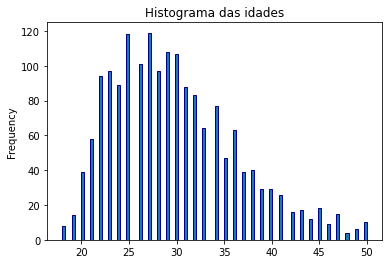

In [52]:
dados['(\'P1\', \'age\')'].plot(kind='hist', bins = 100, edgecolor ='darkblue')
plt.title('Histograma das idades')
plt.show()

A média da idade é de 29 anos

In [3]:
#Cortando as idades para mlehor visualização
cortes = [0, 18, 24, 30, 36, 42, 50, 100]
nomes = ['[0,18]', '[19,24]', '[25,30]', '[31,36]', '[37,42]', '[43,50]', '[51,100]']

dados['idadeT2'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)

In [6]:
dados['idadeT2'].value_counts().sort_index()

[0,18]        8
[19,24]     391
[25,30]     650
[31,36]     422
[37,42]     179
[43,50]      91
[51,100]      0
Name: idadeT2, dtype: int64

Nota-se que ninguem acima de 51 anos respondeu a pesquisa

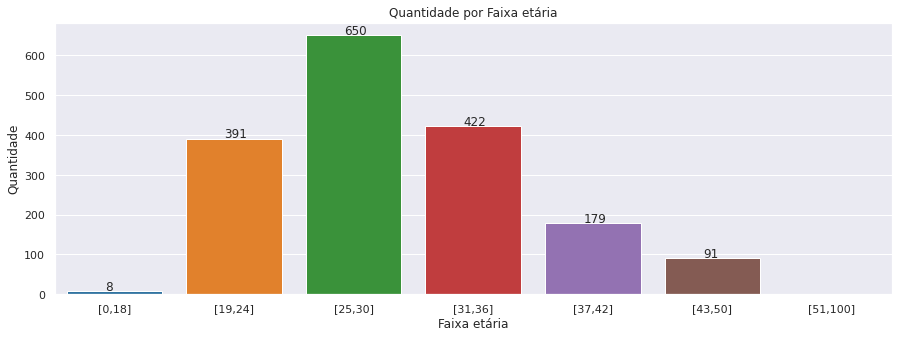

In [137]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=dados, x='idadeT2', palette="tab10")
plt.title('Quantidade por Faixa etária')
plt.ylabel('Quantidade')
plt.xlabel('Faixa etária')

total = len(dados['idadeT2'])
for p in ax.patches:
        qtd_values = '{:.0f}'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2.5
        y = p.get_y() + p.get_height() + 3
        ax.annotate(qtd_values, (x, y))

plt.show()


###Pergunta 2: Relação dos profissionais por estados brasileiros (onde habitam?)

In [ ]:
#para um outro momento: https://medium.com/data-hackers/criando-mapas-interativos-e-choropleth-maps-com-folium-em-python-abffae63bbd6

In [93]:
dados.shape[0]

1765

In [101]:
dados["('P5', 'living_state')"].isna().sum

337

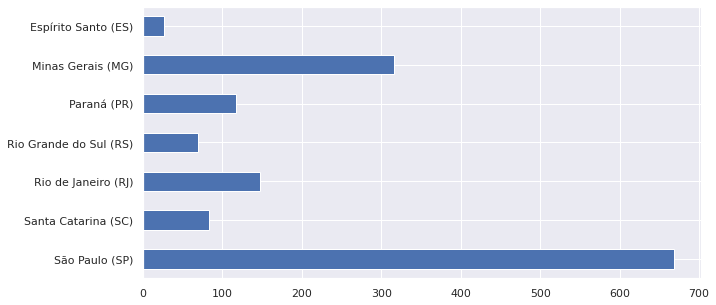

In [111]:
plt.figure(figsize=(10,5))
dados["('P5', 'living_state')"].value_counts().sort_index(ascending=False).plot(kind='barh')

plt.show()

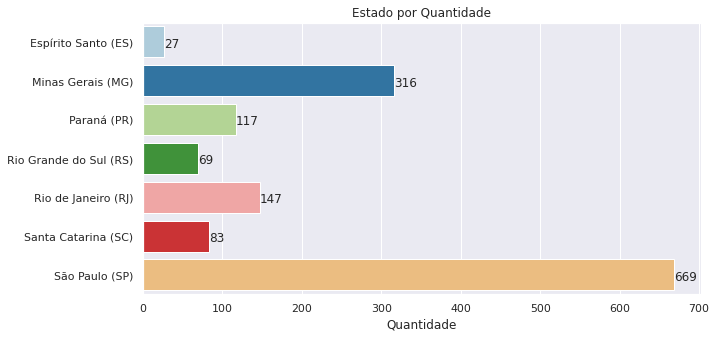

In [138]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y=dados["('P5', 'living_state')"].sort_values(ascending=True), data = dados, palette='Paired')
plt.title('Estado por Quantidade')
plt.xlabel('Quantidade')
plt.ylabel('')

total = len(dados["('P5', 'living_state')"])
for p in ax.patches:
  qtd = '{:.0f}'.format(p.get_width())
  #setando posições no grafico
  x = p.get_x() + p.get_width() 
  y = p.get_y() + p.get_height() / 1.5
  ax.annotate(qtd, (x,y))


plt.show()

Nota-se que dentre os dados que foram preenchidos a maior parte dos profissionais residem em SP, seguidos de MG e RJ.

Como essa pergunta foi mascarada, poucos estados podem estar aparecendo na listagem. De 1765 entrevistados apenas 1428 estão preenchidos.

### Alguns tratamentos

#### *Agrupando as profissoes*

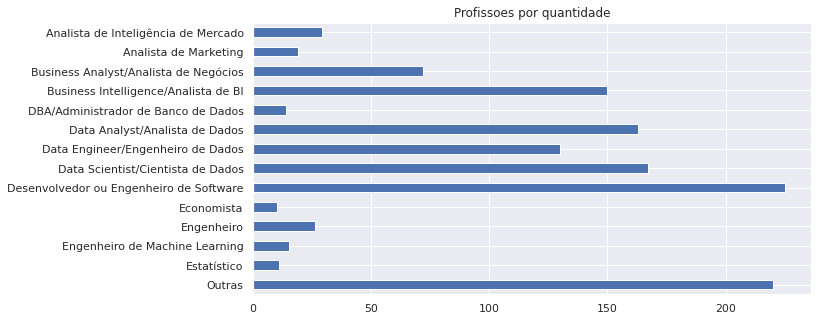

In [206]:
#profissoes de quem respondeu a pesquisa
plt.figure(figsize=(10,5))
dados['(\'D6\', \'anonymized_role\')'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Profissoes por quantidade')
plt.show()

In [167]:
#agrupando as profissoes
profmap = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software', 
                                            'Outras': 'Outras',
                 'Data Scientist/Cientista de Dados': 'Cientista de Dados',
                    'Data Analyst/Analista de Dados': 'Analista de Dados',
              'Business Intelligence/Analista de BI': 'Analista de BI',
                 'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
             'Business Analyst/Analista de Negócios': 'Analista de BI',
               'Analista de Inteligência de Mercado': 'Analista de BI',
                                        'Engenheiro': 'Outras',
                             'Analista de Marketing': 'Outras',
                    'Engenheiro de Machine Learning': 'Cientista de Dados',
               'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
                                       'Estatístico': 'Cientista de Dados',
                                        'Economista': 'Outras'}

dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap)

In [168]:
#separando as bases
lista = ['Cientista de Dados', 'Analista de Dados', 'Analista de BI', 'Engenheiro de Dados']
pds = dados[dados['profissao'].isin(lista)]
cds = dados[dados['profissao'] == 'Cientista de Dados'] 
ads = dados[dados['profissao'] == 'Analista de Dados'] 
abi = dados[dados['profissao'] == 'Analista de BI'] 
eds = dados[dados['profissao'] == 'Engenheiro de Dados']


#OBS.: Essa foi uma forma de analisar os dados apresentada durante a aula.

Dessa forma o grafico ficou com menos profissoes

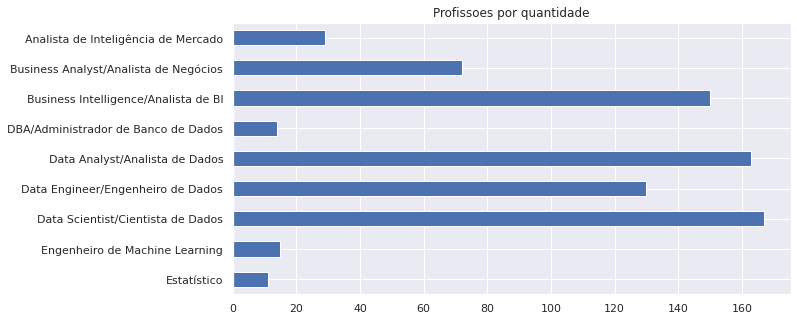

In [207]:
#Agora usando a base com as profissoes agrupadas
plt.figure(figsize=(10,5))
pds['(\'D6\', \'anonymized_role\')'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Profissoes por quantidade')
plt.show()

#### *Ordenando a faixa salarial*

In [ ]:
#"clonando a coluna"
dados["salario2"] = dados["('P16', 'salary_range')"]


In [ ]:
#alterando o tipo da coluna
dados["salario2"] = dados["salario2"] .astype('category')

In [ ]:
#listando as caregorias
dados.salario2.cat.categories

In [ ]:
#reordenando as cetogorias
dados.salario2 = dados.salario2.cat.reorder_categories(['Menos de R$ 1.000/mês',
                                                        'de R$ 1.001/mês a R$ 2.000/mês',
                                                        'de R$ 2.001/mês a R$ 3000/mês',
                                                        'de R$ 3.001/mês a R$ 4.000/mês',
                                                        'de R$ 4.001/mês a R$ 6.000/mês',
                                                        'de R$ 6.001/mês a R$ 8.000/mês',
                                                        'de R$ 8.001/mês a R$ 12.000/mês',
                                                        'de R$ 12.001/mês a R$ 16.000/mês',
                                                        'de R$ 16.001/mês a R$ 20.000/mês',
                                                        'de R$ 20.001/mês a R$ 25.000/mês',
                                                        'Acima de R$ 25.001/mês', ], ordered=True)

#### *Alterando o texto da coluna do tempo de experiencia*

In [ ]:
#alterando texto de "Não tive expericnecia na áre de TI/Engenharia de Software antes de começar a trabalhar na área de dados" para "Não tive experiencia na area de TI"

novo_texto = { 'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados' : 'Não tive experiencia na area de TI anteriormente',
              'Menos de 1 ano' : 'Menos de 1 ano',
              'de 1 a 2 anos' : 'de 1 a 2 anos ',
              'de 2 a 3 anos' : 'de 2 a 3 anos',
              'de 4 a 5 anos' : 'de 4 a 5 anos',
              'de 6 a 10 anos' : 'de 6 a 10 anos',
              'Mais de 10 anos' : 'Mais de 10 anos  '}


dados['tempo_experiencia_anterior'] = dados["(\'P18\', \'time_experience_before\')"].map(novo_texto)

In [ ]:
#precisa ordenar o tempo de experiencia tbm

### Pergunta 3: Qual a relação entre o nivel de ensino com a area de formação e faixa salarial?

Para essa pergunta vou utilizar a base separada por profissoes e aprofundar apenas nos profissionais que se consideraram Cientista de Dados

In [ ]:
#para um ooutro momento:
  #arrumar os eixos
  #alterar o titulo da legenda

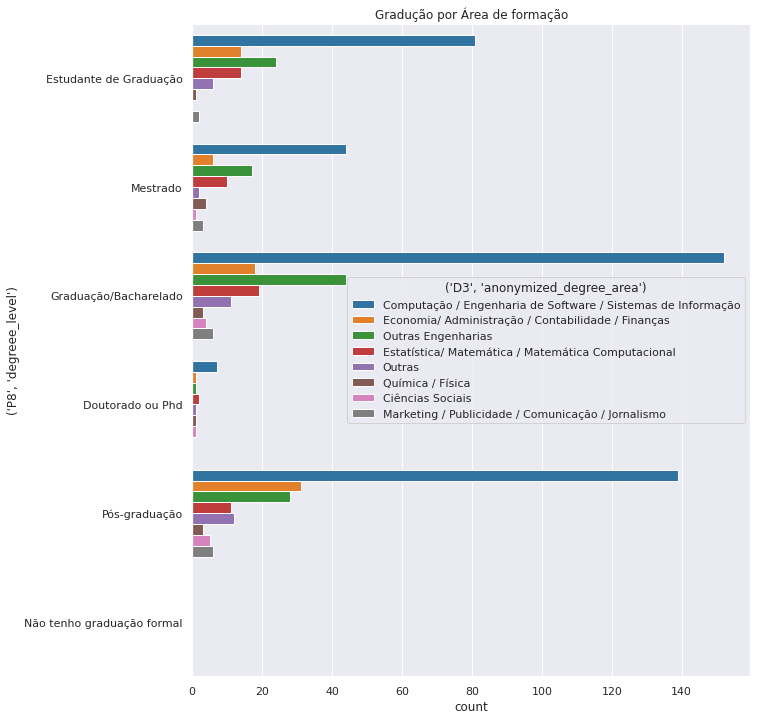

In [199]:
sns.countplot(y=pds["('P8', 'degreee_level')"], data = pds, hue=pds["('D3', 'anonymized_degree_area')"], palette='tab10')
plt.title('Gradução por Área de formação')
plt.show()

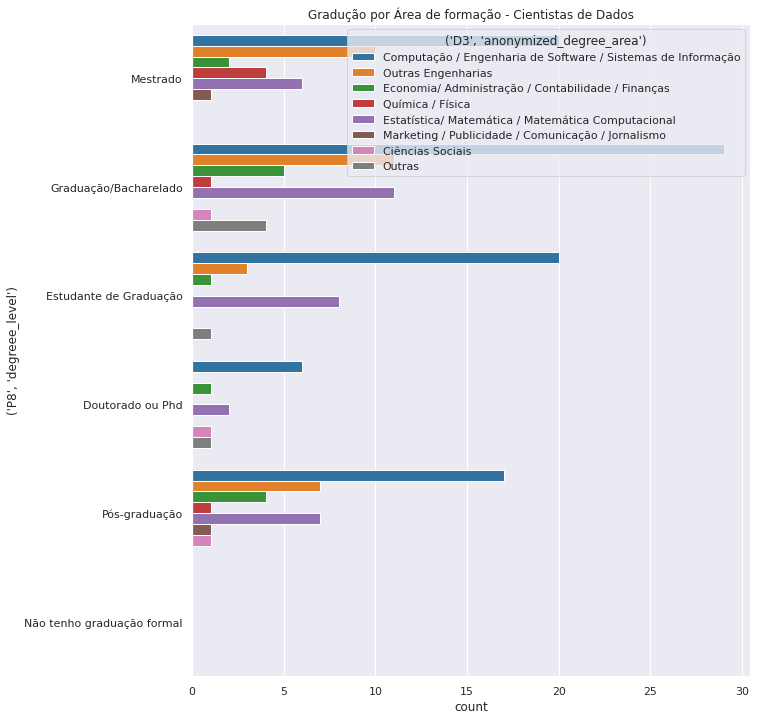

In [200]:
sns.countplot(y=cds["('P8', 'degreee_level')"], data = cds, hue=cds["('D3', 'anonymized_degree_area')"], palette='tab10')
plt.title('Gradução por Área de formação - Cientistas de Dados')
plt.show()

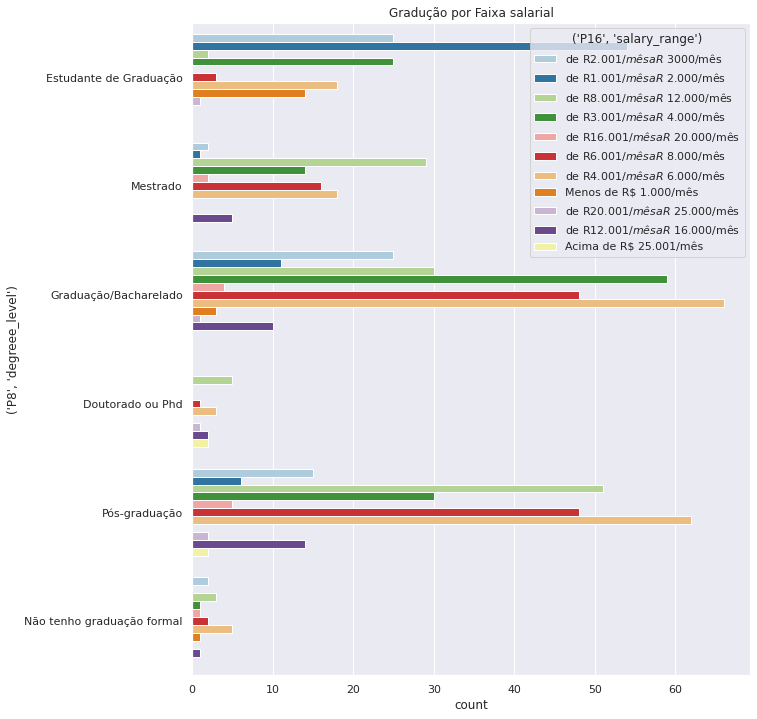

In [201]:
sns.countplot(y=pds["('P8', 'degreee_level')"], data = pds, hue=pds["('P16', 'salary_range')"], palette='Paired')
plt.title('Gradução por Faixa salarial')
plt.show()

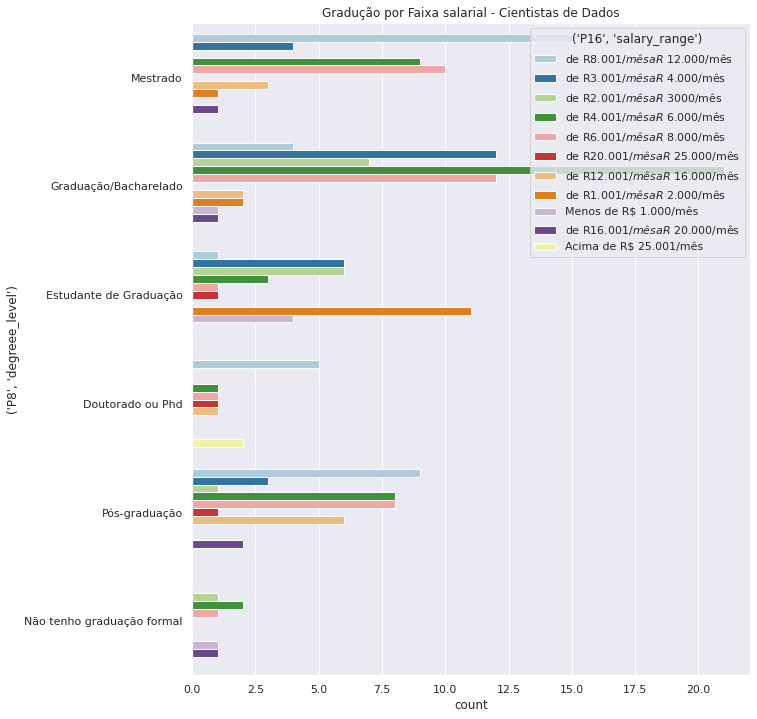

In [203]:
sns.countplot(y=cds["('P8', 'degreee_level')"], data = cds, hue=cds["('P16', 'salary_range')"], palette='Paired')
plt.title('Gradução por Faixa salarial - Cientistas de Dados')
plt.show()

Um grupo legal de aprofundar são os estudantes de gradução para ver quais os cursos desses profssionais. Observando esse grafico é possivel observar que pessoas que nao tem uma gradução formal podem ser cientistas de dados. Outra coisa legal de observar é que as pessoas que tem os maiores salários como cientistas de dados possuem Pos-gradução, Doutorado ou PHD.

### Pergunta 4: Dos entrevistados que possuem maior experiencia na area de dados, quantos sao gestores? eles tem o maior salário?

In [ ]:
sns.countplot(y=dados["('P8', 'degreee_level')"], data = dados, hue=dados["salario2"], palette='Paired')
plt.title('Gradução por Faixa salarial - Base de dados Original')
plt.show()

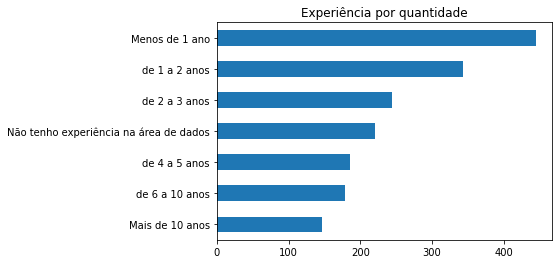

In [12]:
dados["('P17', 'time_experience_data_science')"].value_counts().sort_values().plot(kind='barh')
plt.title('Experiência por quantidade')
plt.show()

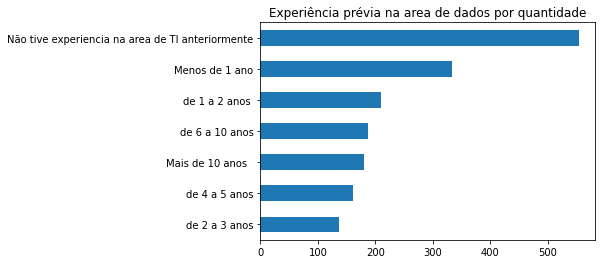

In [54]:
dados["tempo_experiencia_anterior"].value_counts().sort_values().plot(kind='barh')
plt.title('Experiência prévia na area de dados por quantidade')
plt.show()
